<a href="https://colab.research.google.com/github/ErkinArikan/Alarm/blob/master/Dummy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#importing part

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from scipy import stats

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error


# XGBoost
from xgboost import XGBClassifier
#Light
import lightgbm as lgb

# warning 
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("/content/sample_data/data.csv")

In [4]:
df.head(100)

,Ders Kodu\n\nCourse Code,Ders Adı\n\nCourse Name,Dönem\n\nTerm,Yıl\n\nYear,Kalan Öğrenci Sayısı\n\nFail,Geçen Öğrenci Sayısı\n\nPass,Ön Koşul Ders(ler)ini Geçen Öğrenci Sayısı\n\nPrerequisite Pass,Hazırlık Okulunu Geçip Derse Kayıt Olabilecek Öğrenci Sayısı\n\nPrep School Pass,Önceki Notunu Yükseltmek için Dersi Alan Öğrenci Sayısı\n\nRaise Grades,Not Ortalamasını Yükseltmek için Dersi Alan Öğrenci Sayısı\n\nIncrease GPA,Dersi Alan Yan / Çift Anadal Öğrencilerin Sayısı\n\nMinor / Double Major,Ders Kayıtlı Öğrenci Sayısı\n\nEnrolled Students,Gelecek Dönem Dersi Alacak Öğrenci Sayısı Tahmini\n\nFuture Enroll
0,CMPE114,Computer Programming II,Fall,2003,30,96,100,0,6,10,1,126,NaN
1,CMPE114,Computer Programming II,Spring,2004,40,97,95,0,8,9,1,137,NaN
2,CMPE114,Computer Programming II,Summer,2004,0,0,0,0,0,0,0,0,NaN
3,CMPE114,Computer Programming II,Fall,2004,29,93,97,0,8,9,1,122,NaN
4,CMPE114,Computer Programming II,Spring,2005,27,96,95,0,8,9,0,123,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,SE346,Software Engineering,Summer,2015,0,0,0,0,0,0,0,0,NaN
96,SE346,Software Engineering,Fall,2015,0,0,0,0,0,0,0,0,NaN
97,SE346,Software Engineering,Spring,2016,26,93,0,0,5,4,0,119,NaN
98,SE346,Software Engineering,Summer,2016,0,0,0,0,0,0,0,0,NaN


In [5]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 13 columns):
 #   Column                                                                          Non-Null Count  Dtype  
---  ------                                                                          --------------  -----  
 0   Ders Kodu

Course Code                                                          600 non-null    object 
 1   Ders Adı

Course Name                                                           600 non-null    object 
 2   Dönem

Term                                                                     600 non-null    object 
 3   Yıl

Year                                                                       600 non-null    int64  
 4   Kalan Öğrenci Sayısı

Fail                                                      600 non-null    int64  
 5   Geçen Öğrenci Sayısı

Pass                                                      600 non-null    int64  
 6   Ön Koşul Ders(ler)

In [6]:
df.describe()

,Yıl\n\nYear,Kalan Öğrenci Sayısı\n\nFail,Geçen Öğrenci Sayısı\n\nPass,Ön Koşul Ders(ler)ini Geçen Öğrenci Sayısı\n\nPrerequisite Pass,Hazırlık Okulunu Geçip Derse Kayıt Olabilecek Öğrenci Sayısı\n\nPrep School Pass,Önceki Notunu Yükseltmek için Dersi Alan Öğrenci Sayısı\n\nRaise Grades,Not Ortalamasını Yükseltmek için Dersi Alan Öğrenci Sayısı\n\nIncrease GPA,Dersi Alan Yan / Çift Anadal Öğrencilerin Sayısı\n\nMinor / Double Major,Ders Kayıtlı Öğrenci Sayısı\n\nEnrolled Students,Gelecek Dönem Dersi Alacak Öğrenci Sayısı Tahmini\n\nFuture Enroll
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,0.0
mean,2013.166667,9.141667,35.325000,21.878333,2.891667,2.888333,3.238333,1.046667,44.466667,NaN
std,5.790346,12.244106,42.428485,38.702110,17.505351,4.335573,4.608716,2.019394,54.051162,NaN
min,2003.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,2008.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,2013.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,2018.000000,18.000000,79.000000,30.000000,0.000000,6.000000,8.000000,2.000000,101.250000,NaN
max,2023.000000,78.000000,227.000000,100.000000,217.000000,47.000000,34.000000,17.000000,304.000000,NaN


In [7]:
# missing value var mı onu gösteriyor.Yok
print(df.isna().sum())

Ders Kodu\n\nCourse Code                                                              0
Ders Adı\n\nCourse Name                                                               0
Dönem\n\nTerm                                                                         0
Yıl\n\nYear                                                                           0
Kalan Öğrenci Sayısı\n\nFail                                                          0
Geçen Öğrenci Sayısı\n\nPass                                                          0
Ön Koşul Ders(ler)ini Geçen Öğrenci Sayısı\n\nPrerequisite Pass                       0
Hazırlık Okulunu Geçip Derse Kayıt Olabilecek Öğrenci Sayısı\n\nPrep School Pass      0
Önceki Notunu Yükseltmek için Dersi Alan Öğrenci Sayısı\n\nRaise Grades               0
Not Ortalamasını Yükseltmek için Dersi Alan Öğrenci Sayısı\n\nIncrease GPA            0
Dersi Alan Yan / Çift Anadal Öğrencilerin Sayısı\n\nMinor / Double Major              0
Ders Kayıtlı Öğrenci Sayısı\n\nE

In [8]:
#istenmeyen sütun atıldı.
df= df.drop(labels="Gelecek Dönem Dersi Alacak Öğrenci Sayısı Tahmini\n\nFuture Enroll",axis=1)

In [9]:
#target ismi ile değiştirildi
df=df.rename(columns={"Ders Kayıtlı Öğrenci Sayısı\n\nEnrolled Students":"Target"})
df.head()

,Ders Kodu\n\nCourse Code,Ders Adı\n\nCourse Name,Dönem\n\nTerm,Yıl\n\nYear,Kalan Öğrenci Sayısı\n\nFail,Geçen Öğrenci Sayısı\n\nPass,Ön Koşul Ders(ler)ini Geçen Öğrenci Sayısı\n\nPrerequisite Pass,Hazırlık Okulunu Geçip Derse Kayıt Olabilecek Öğrenci Sayısı\n\nPrep School Pass,Önceki Notunu Yükseltmek için Dersi Alan Öğrenci Sayısı\n\nRaise Grades,Not Ortalamasını Yükseltmek için Dersi Alan Öğrenci Sayısı\n\nIncrease GPA,Dersi Alan Yan / Çift Anadal Öğrencilerin Sayısı\n\nMinor / Double Major,Target
0,CMPE114,Computer Programming II,Fall,2003,30,96,100,0,6,10,1,126
1,CMPE114,Computer Programming II,Spring,2004,40,97,95,0,8,9,1,137
2,CMPE114,Computer Programming II,Summer,2004,0,0,0,0,0,0,0,0
3,CMPE114,Computer Programming II,Fall,2004,29,93,97,0,8,9,1,122
4,CMPE114,Computer Programming II,Spring,2005,27,96,95,0,8,9,0,123


Text(0.5, 1.0, 'Corr Between Futures')

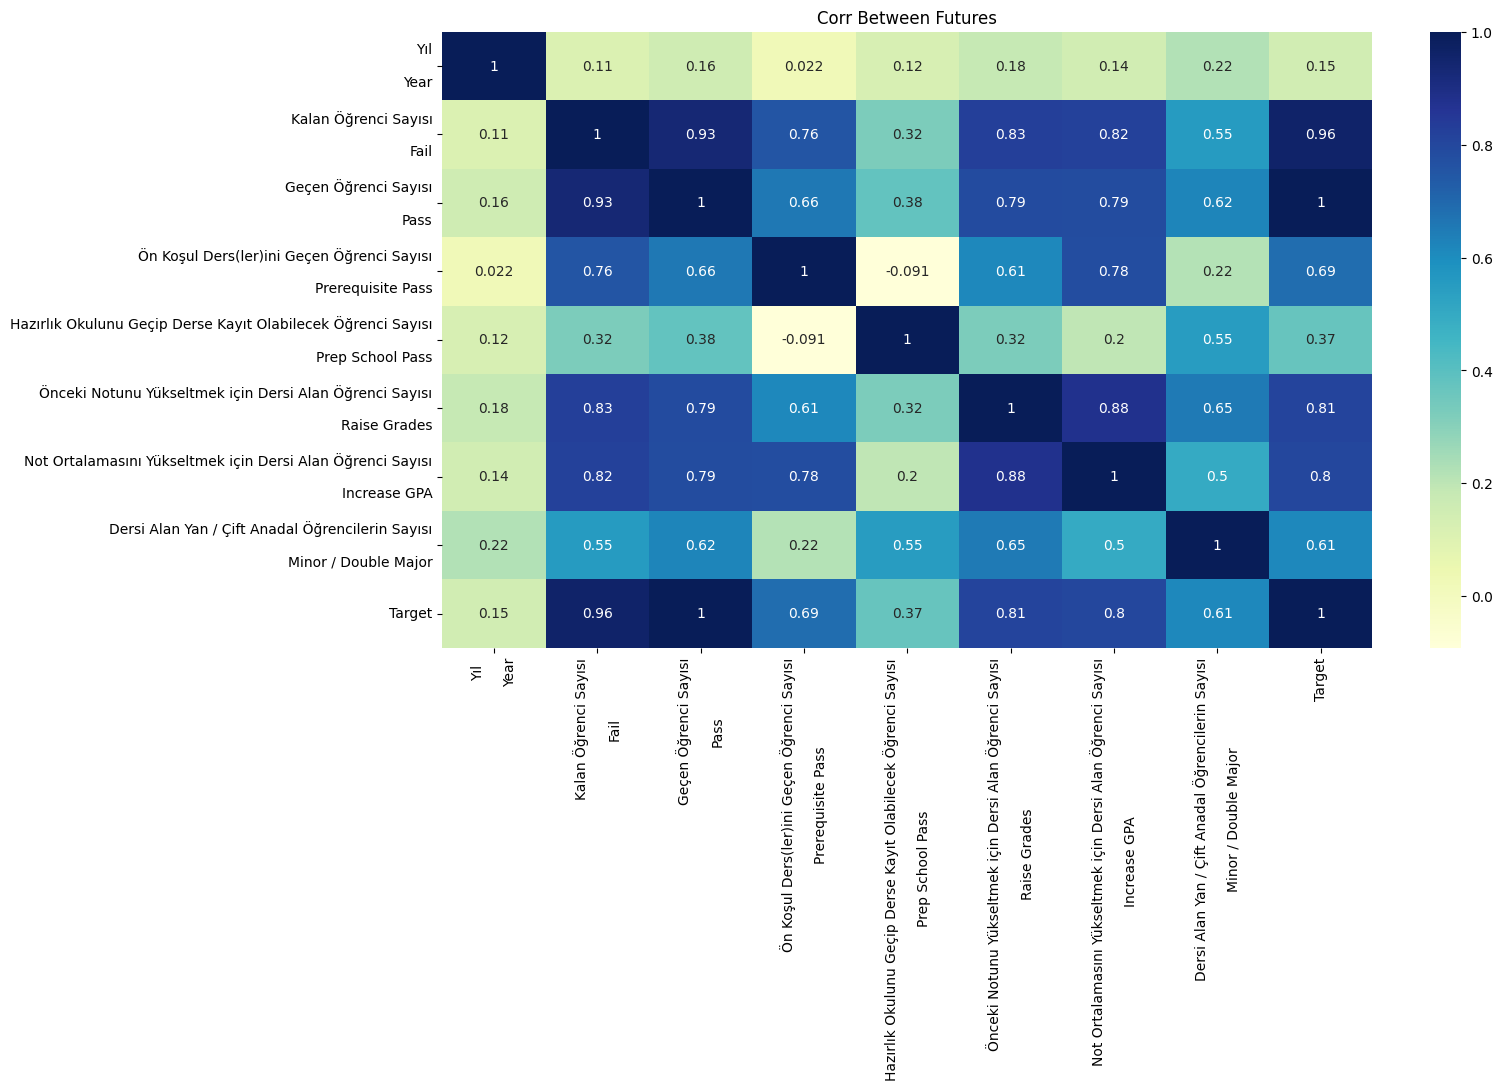

In [10]:
#Exploratory Data Analyse
#Numeric futurelarımız olduğu için correlasyona bakalım
#Burada mantıksız şeyleri çıkartabilriz. Origin columnu mantıksız geldi

corr_matrix= df.corr()

plt.figure(figsize=(15,8))
sns.heatmap(corr_matrix, annot= True, cmap="YlGnBu")
plt.title("Corr Between Futures")
